In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Assignment-1-a: coding part

---
* For mathmatical processes, please see the attached PDF document.

In [2]:
# Set the grid size
dx1 = 0.01
dy1 = 0.01
# Set the mesh size
xl = 2.
yl = 1.

## Assignment-1-b: plot the $\Psi$

In [3]:
# Create a function to get psi field
def get_num_psi(dx):
    # get the grid point number
    jmax = int(xl/dx)+1
    imax = int(yl/dx)+1

    # Initialise the mesh with zeros
    psi = np.zeros((imax, jmax))

    # Create boundaries correspondingly from the derivation in the PDF
    # Order: left, top, right, bottom
    psi[-1, :] = np.linspace(120, 0, jmax)
    psi[0, :] = 60
    psi[:, 0] = np.linspace(60, 120, imax)
    psi[:, -1] = np.linspace(60, 0, imax)

    atol, iteration, sum_resid = 1e-3, 0, 1
    a, b, c, d, e = 1, 1, 1, 1, -4
    while sum_resid > atol:
        psi_in = psi[1:imax-1, 1:jmax-1]
        ij_field = np.fromfunction(lambda i, j: i+j, psi_in.shape)
        io, jo = np.where(ij_field%2 == iteration%2)
        i, j = io+1, jo+1
        cnt = len(i)
        resid = np.zeros(psi.shape)
        resid[i, j] = a*psi[i+1, j]+b*psi[i-1,j]+c*psi[i,j+1]+d*psi[i,j-1]+e*psi[i,j]
        psi[i, j] = psi[i, j]-resid[i, j]/e
        resid_m = np.sum(np.abs(resid))
        sum_resid = (sum_resid+resid_m)/cnt
        iteration += 1
    return psi

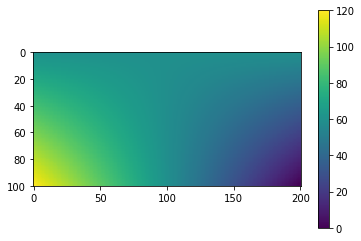

In [4]:
psi1 = get_num_psi(dx1)
plt.imshow(psi1)
plt.colorbar()

## Assignment-1-c: plot the quiver

In [5]:
def plot_quiver(psi0, dx):
    # get the grid point number
    jmax = int(xl/dx)+1
    imax = int(yl/dx)+1
    vx = np.zeros((imax, jmax))
    vy = np.zeros((imax, jmax))

    # Get vy field
    for i in range(imax):
        for j in range(jmax):
            if i>0 and i<imax-1:
                vy[i, j] = -(psi0[i+1, j]-psi0[i-1, j])/2/dx
            elif i>0:
                vy[i, j] = -(psi0[i, j]-psi0[i-1, j])/dx
            else:
                vy[i, j] = -(psi0[i+1, j]-psi0[i, j])/dx
    # Get vx field
    for i in range(imax):
        for j in range(jmax):
            if j>0 and j<jmax-1:
                vx[i, j] = (psi0[i, j+1]-psi0[i, j-1])/2/dx
            elif j>0:
                vx[i, j] = (psi0[i, j]-psi0[i, j-1])/dx
            else:
                vx[i, j] = (psi0[i, j+1]-psi0[i, j])/dx
    # Move the original coordinates to bottom left
    vx = np.flipud(vx)
    vy = np.flipud(vy)
    plt.quiver(vy[::5,::5], -vx[::5,::5])

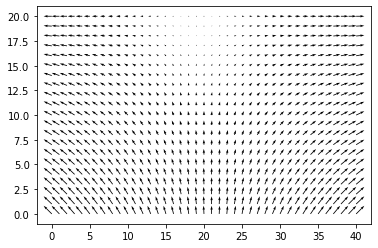

In [6]:
plot_quiver(psi1, dx1)

## Assignment-1-d: coding part
---
* For mathmatical processes, please see the attached PDF document.


In [7]:
from numpy import sin, cos, pi, tan, cosh, sinh, tanh
# n_max is restricted by Numpy's cosh, sinh and tanh functions
# when n_max gets too big the it gives RunTimeWarning because the exponential
# value becomes inf
def get_ana_psi(dx, n_max):
    jmax = int(xl/dx)+1
    imax = int(yl/dx)+1
    gamma_n = np.zeros((4, n_max))
    for n in range(1, n_max):
        # The integrate result of boundaries for:
        # Left boundary
        gamma_n[0, n] = 120/(n*pi)*(-cos(n*pi)+2)
        # Top boundary
        gamma_n[1, n] = 120/(n*pi)*(-cos(n*pi)+1)
        # Right boundary
        gamma_n[2, n] = 120/(n*pi)*(-cos(n*pi))
        # Bottom boundary
        gamma_n[3, n] = 240/(n*pi)
    psi_a = np.zeros((imax, jmax))
    for i in range(imax):
        for j in range(jmax):
            for n in range(1, n_max):
                y = i*dx
                x = j*dx
                # Calculating the summation of psi with respect to gamma
                # Coordinate not changed
                psi_a[i, j] += gamma_n[0, n]*sin(n*pi*y)*(cosh(n*pi*x)-sinh(n*pi*x)/tanh(n*pi*2))
                # Coordinate rotated to fit top boundary as the left
                psi_a[i, j] += gamma_n[1, n]*sin(n*pi*x/2)*(cosh(n*pi*(1.-y)/2)-sinh(n*pi*(1.-y)/2)/tanh(n*pi/2))
                # Coordinate rotated to fit right boundary as the left
                psi_a[i, j] += gamma_n[2, n]*sin(n*pi*y)*(cosh(n*pi*(2.-x))-sinh(n*pi*(2.-x))/tanh(n*pi*2))
                # Coordinate rotated to fit bottom boundary as the left
                psi_a[i, j] += gamma_n[3, n]*sin(n*pi*x/2)*(cosh(n*pi*y/2)-sinh(n*pi*y/2)/tanh(n*pi/2))
    # To change the original point to bottom left, need to flip the matrix vertically
    return np.flipud(psi_a)

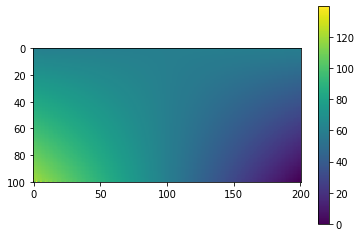

In [9]:
psi_a = get_ana_psi(dx1, 110)
plt.imshow(psi_a)
plt.colorbar()

In [27]:
print(psi_a)

[[ 5.36739720e-13  5.59859015e+01  7.01821283e+01 ...  7.01821283e+01
   5.59859015e+01  1.10048443e-12]
 [ 7.07308256e+01  5.92290151e+01  6.20525005e+01 ...  6.08766061e+01
   5.80443069e+01  6.96334310e+01]
 [ 5.65543397e+01  6.08244151e+01  6.13537896e+01 ...  5.90015877e+01
   5.84421207e+01  5.39581325e+01]
 ...
 [ 1.09214369e+02  1.17464330e+02  1.17982568e+02 ...  2.37280906e+00
   1.80220529e+00  1.29810360e+00]
 [ 1.39815559e+02  1.16019204e+02  1.21159538e+02 ...  1.76956832e+00
   1.25411824e+00  5.48697336e-01]
 [ 0.00000000e+00  1.11026846e+02  1.39266862e+02 ...  1.09739467e+00
   9.44957586e-01 -1.80033298e-14]]


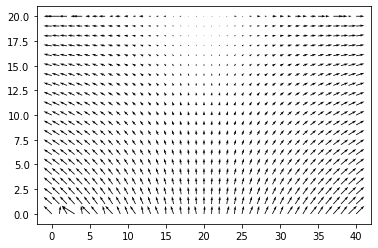

In [10]:
# Plot the quiver graph for the analytical solution of stream functions
psi0 = psi_a
# plot_quiver(psi0, dx1)
# For the purpose to smooth the boundary conditions
jmax = int(xl/dx1)+1
imax = int(yl/dx1)+1
psi0[-1, :] = np.linspace(120, 0, jmax)
psi0[0, :] = 60
psi0[:, 0] = np.linspace(60, 120, imax)
psi0[:, -1] = np.linspace(60, 0, imax)
plot_quiver(psi0, dx1)

### Compare the analytical solution and the numerical solution

$\Psi$ field 
---
* The four corners of the analytical result are inconsistent with the boundary conditions whereas the numerical result have smooth boundary patterns. 
* The two graphs below show the difference of two results. The outer parts of two fields are about the same while the boundary elements near the corners appear to be chaotic. 
* The outer part of the two results is about the same, while the inner part (showed as lighter colour below) showed that the numerical solution is generally about 0-2 lower than the analytical solution.
* The layer just inside the boundary is also affected yet not as dramatic as the outermost layer.

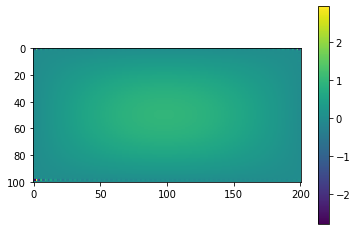

In [11]:
plt.imshow(psi_a-psi1)
plt.colorbar()

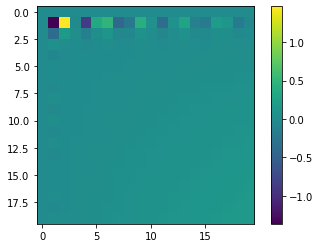

In [13]:
# Show bottom left corner as an example
plt.imshow((psi_a-psi1)[:20, :20])
plt.colorbar()

### The changing trend of the results as $\Delta x$ changes
---
1. The code below manages to compare the discrepency between numerical and analytical results;
2. The comparison is then conducted by calculating the root mean square of the difference between two meshes.
---

* The graph below shows the dx from 0.01 to 0.5 with 0.001 as the step length (thus 500 steps in total) so the running of the code could take up to 5 minutes.
---
* Result: 

The graph below showed the oscillation-like pattern of the RMS of discrepency between two results. As $log\Delta x$ decreases, the RMS range decreases accordingly in an exponential way, and the oscillation pattern is being restricted when $\Delta x<10^{-1}$ and almost smooth around $\Delta x\approx10^{-2}$. RMS of differences, therefore, is approaching 0 as the $\Delta x$ decreases i.e. the resolution of numerical solution field increases, suggesting a convergence trend of numerical solution to reach the analytical one.



In [18]:
import sys

dx_array = np.linspace(0.5, 0.01, 500)

def get_diff_rms():
    diff_array = np.zeros(500)
    for i in range(len(dx_array)):
        psi_n = get_num_psi(dx_array[i])
        psi_a = get_ana_psi(dx_array[i], 110)
        # show progress every 2 steps
        if (i+1)%2==0:  
            sys.stdout.write('Done steps %d (of %d)\r' % (i+1,len(dx_array)))
        diff = np.sqrt(np.mean((psi_n-psi_a) ** 2))
        diff_array[i] += diff
    return diff_array

In [22]:
def get_diff_mean():
    diff_array = np.zeros(500)
    for i in range(len(dx_array)):
        psi_n = get_num_psi(dx_array[i])
        psi_a = get_ana_psi(dx_array[i], 110)
        # show progress every 2 steps
        if (i+1)%2==0:  
            sys.stdout.write('Done steps %d (of %d)\r' % (i+1,len(dx_array)))
        diff = np.mean(np.abs(psi_n-psi_a))
        diff_array[i] += diff
    return diff_array

In [20]:
diff_rms = get_diff_rms()

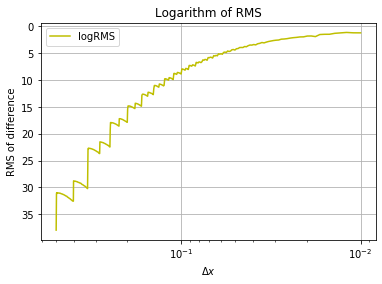

In [41]:
plt.plot(dx_array, diff_rms, color='y', label='logRMS')
plt.grid(True)
plt.title('Logarithm of RMS')
plt.xlabel('$\Delta x$')
plt.ylabel('RMS of difference')
plt.legend(loc='best')
# plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()